In [193]:
import pandas as pd
import numpy as np
from datetime import timedelta
import time
import datetime
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [10, 5]

In [194]:
df = pd.read_csv('Online Retail.xlsx - Online Retail.csv', low_memory = False)

In [195]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [196]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [197]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [198]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [199]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [200]:
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [202]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [203]:
df['InvoiceNo'][0]

'536365'

In [204]:
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [205]:
#df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [206]:
df['InvoiceNo'] = df['InvoiceNo'].replace('C', '', regex = True)

In [207]:
df['InvoiceNo'] = df['InvoiceNo'].replace('A', '', regex = True)

In [208]:
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int32         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 33.9+ MB


In [210]:
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [211]:
df['StockCode'] = df['StockCode'].replace('[A-Za-z]', '', regex = True)
df['StockCode'] = df['StockCode'].replace(' ','', regex=True)

In [212]:
#df['StockCode'] = df['StockCode'].str.strip()

In [213]:
df['StockCode'].unique()

array(['85123', '71053', '84406', ..., '23561', '90089', '23843'],
      dtype=object)

In [214]:
df['StockCode'] = pd.to_numeric(df['StockCode'], errors="coerce")

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int32         
 1   StockCode    396470 non-null  float64       
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(2)
memory usage: 33.9+ MB


In [216]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 1)Find and plot top 25 customers having the most transactions

In [217]:
df.groupby('CustomerID').agg({'InvoiceNo': pd.Series.count}).reset_index().sort_values('InvoiceNo', ascending = False).head(25)

,CustomerID,InvoiceNo
4010,17841.0,7847
1879,14911.0,5675
1289,14096.0,5111
326,12748.0,4595
1661,14606.0,2700
2176,15311.0,2379
1689,14646.0,2076
562,13089.0,1818
690,13263.0,1677
1434,14298.0,1637


# 2)Find and plot top 10 products having the most Total Sales

In [218]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [219]:
df['Total_Sales'] = df['Quantity'] * df['UnitPrice']
df['Total_Sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total_Sales, Length: 397884, dtype: float64

In [220]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [221]:
df.groupby('Description').agg({'Total_Sales': np.sum}).sort_values('Total_Sales', ascending = False).head(10)

,Total_Sales
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


# 3) Implement RFM Analysis on the customer base and categorize the customers into 12 different categories based on the labeling used in live-coding

In [222]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [223]:
df["Recency"] = (df["InvoiceDate"].max() - df["InvoiceDate"]).dt.days
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Recency
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [224]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [225]:
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [226]:
df.groupby(['CustomerID']).agg({'Recency': np.min, 'Total_Sales': np.sum, 'InvoiceDate': pd.Series.nunique}).reset_index().sort_values('Recency', ascending = False)

,CustomerID,Recency,Total_Sales,InvoiceDate
1749,14729.0,373,313.49,1
4064,17908.0,373,243.28,1
355,12791.0,373,192.60,1
1037,13747.0,373,79.60,1
3103,16583.0,373,233.45,1
...,...,...,...,...
550,13069.0,0,4436.12,24
554,13077.0,0,729.27,4
2096,15208.0,0,870.12,5
2083,15189.0,0,16225.39,41


In [227]:
df1 = df.groupby(['CustomerID']).agg({'Recency': np.min, 'Total_Sales': np.sum, 'InvoiceDate': pd.Series.nunique}).reset_index()
df1

,CustomerID,Recency,Total_Sales,InvoiceDate
0,12346.0,325,77183.60,1
1,12347.0,1,4310.00,7
2,12348.0,74,1797.24,4
3,12349.0,18,1757.55,1
4,12350.0,309,334.40,1
...,...,...,...,...
4333,18280.0,277,180.60,1
4334,18281.0,180,80.82,1
4335,18282.0,7,178.05,2
4336,18283.0,3,2094.88,16


In [228]:
df1.rename(columns={"Recency":"Recency", "InvoiceDate":"Frequency", "Total_Sales":"Monetary"}, inplace = True)

In [229]:
df1

,CustomerID,Recency,Monetary,Frequency
0,12346.0,325,77183.60,1
1,12347.0,1,4310.00,7
2,12348.0,74,1797.24,4
3,12349.0,18,1757.55,1
4,12350.0,309,334.40,1
...,...,...,...,...
4333,18280.0,277,180.60,1
4334,18281.0,180,80.82,1
4335,18282.0,7,178.05,2
4336,18283.0,3,2094.88,16


In [230]:
df1["recency_score"] = pd.qcut(df1["Recency"],4, labels=[4, 3, 2, 1])

df1["frequency_score"] = pd.qcut(df1["Frequency"].rank(method="first"), 4,labels=[1, 2, 3, 4])

df1["monetary_score"] = pd.qcut(df1["Monetary"], 4,labels=[1, 2, 3, 4] )

df1

,CustomerID,Recency,Monetary,Frequency,recency_score,frequency_score,monetary_score
0,12346.0,325,77183.60,1,1,1,4
1,12347.0,1,4310.00,7,4,4,4
2,12348.0,74,1797.24,4,2,3,4
3,12349.0,18,1757.55,1,3,1,4
4,12350.0,309,334.40,1,1,1,2
...,...,...,...,...,...,...,...
4333,18280.0,277,180.60,1,1,2,1
4334,18281.0,180,80.82,1,1,2,1
4335,18282.0,7,178.05,2,4,3,1
4336,18283.0,3,2094.88,16,4,4,4


In [231]:
df1["RFM_Segment"] = df1["recency_score"].astype(str) + df1["frequency_score"].astype(str) + df1["monetary_score"].astype(str)

In [232]:
df1["RFM Score"] = df1[["recency_score", "frequency_score", "monetary_score"]].sum(axis=1)

In [233]:
df1

,CustomerID,Recency,Monetary,Frequency,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score
0,12346.0,325,77183.60,1,1,1,4,114,6
1,12347.0,1,4310.00,7,4,4,4,444,12
2,12348.0,74,1797.24,4,2,3,4,234,9
3,12349.0,18,1757.55,1,3,1,4,314,8
4,12350.0,309,334.40,1,1,1,2,112,4
...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,180.60,1,1,2,1,121,4
4334,18281.0,180,80.82,1,1,2,1,121,4
4335,18282.0,7,178.05,2,4,3,1,431,8
4336,18283.0,3,2094.88,16,4,4,4,444,12


In [234]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}

df1["Segment_labels"] = df1["RFM_Segment"]
df1["Segment_labels"] = df1["Segment_labels"].replace(segt_map, regex= True)
df1

,CustomerID,Recency,Monetary,Frequency,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score,Segment_labels
0,12346.0,325,77183.60,1,1,1,4,114,6,Top at Risk
1,12347.0,1,4310.00,7,4,4,4,444,12,VIP
2,12348.0,74,1797.24,4,2,3,4,234,9,Top Recent
3,12349.0,18,1757.55,1,3,1,4,314,8,Top Recent
4,12350.0,309,334.40,1,1,1,2,112,4,Need Activation
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,180.60,1,1,2,1,121,4,Need Activation
4334,18281.0,180,80.82,1,1,2,1,121,4,Need Activation
4335,18282.0,7,178.05,2,4,3,1,431,8,Low New
4336,18283.0,3,2094.88,16,4,4,4,444,12,VIP


# 4)For each one of the above segments, calculate the number of customers per segment, total Monetary value (Sales) per segment as well as Mean Recency and Mean Monetary Value per segment.

In [235]:
pareto = df1.groupby('Segment_labels').agg({'CustomerID': pd.Series.nunique, 'Monetary': np.sum, 'Frequency': np.mean, 'Recency':np.mean}).reset_index()
pareto

,Segment_labels,CustomerID,Monetary,Frequency,Recency
0,High Loyal,201,223176.190,3.895522,84.179104
1,High New,243,233621.920,1.679012,53.440329
2,High Promising,488,549163.581,4.586066,18.670082
3,Low Loyal,454,83207.420,1.266520,61.374449
4,Low New,111,21379.640,1.621622,9.198198
5,Medium Loyal,86,42854.441,3.209302,91.290698
6,Medium New,468,213847.961,1.433761,51.382479
7,Medium Potential,168,87427.800,3.107143,21.398810
8,Need Activation,1034,405183.300,1.500967,247.417795
9,Top Recent,205,792983.440,4.814634,72.902439


In [236]:
df1["CumulativePercentage"] = (df1["Monetary"].cumsum()/
                                      df1["Monetary"].sum()*100).round(2)
df1

,CustomerID,Recency,Monetary,Frequency,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score,Segment_labels,CumulativePercentage
0,12346.0,325,77183.60,1,1,1,4,114,6,Top at Risk,0.87
1,12347.0,1,4310.00,7,4,4,4,444,12,VIP,0.91
2,12348.0,74,1797.24,4,2,3,4,234,9,Top Recent,0.93
3,12349.0,18,1757.55,1,3,1,4,314,8,Top Recent,0.95
4,12350.0,309,334.40,1,1,1,2,112,4,Need Activation,0.96
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,180.60,1,1,2,1,121,4,Need Activation,99.95
4334,18281.0,180,80.82,1,1,2,1,121,4,Need Activation,99.95
4335,18282.0,7,178.05,2,4,3,1,431,8,Low New,99.96
4336,18283.0,3,2094.88,16,4,4,4,444,12,VIP,99.98


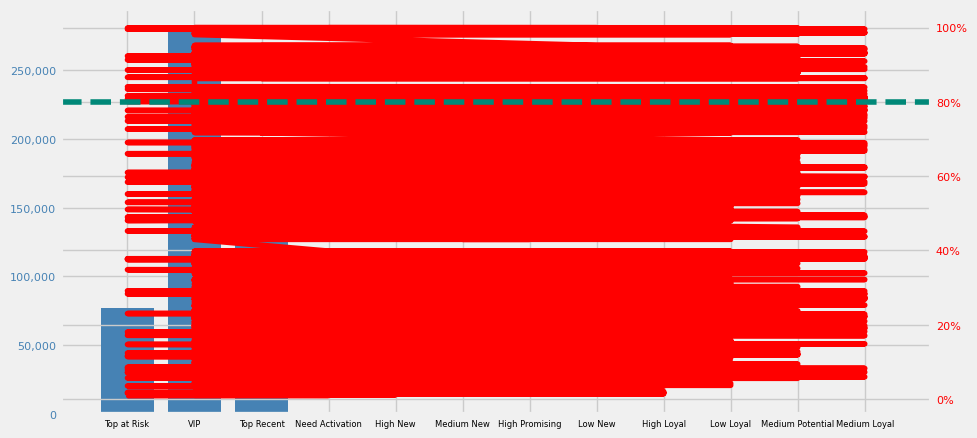

In [237]:

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df1['Segment_labels'], df1['Monetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1['Segment_labels'], df1['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

# 5)Use the Pareto Principle for the 12 Segments that were produced. Is the Pareto Principle applied for our segments? Make the corresponding plot.

In [238]:
pareto

,Segment_labels,CustomerID,Monetary,Frequency,Recency
0,High Loyal,201,223176.190,3.895522,84.179104
1,High New,243,233621.920,1.679012,53.440329
2,High Promising,488,549163.581,4.586066,18.670082
3,Low Loyal,454,83207.420,1.266520,61.374449
4,Low New,111,21379.640,1.621622,9.198198
5,Medium Loyal,86,42854.441,3.209302,91.290698
6,Medium New,468,213847.961,1.433761,51.382479
7,Medium Potential,168,87427.800,3.107143,21.398810
8,Need Activation,1034,405183.300,1.500967,247.417795
9,Top Recent,205,792983.440,4.814634,72.902439


In [239]:
##pareto["cust_id"][11] + seg_pareto["cust_id"][9]+ seg_pareto["cust_id"][8] + seg_pareto["cust_id"][1] + seg_pareto["cust_id"][1]

# Customer & Market Analysis Part2 Exercises
#Association Rules – Cohort Analysis

In [240]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter
from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [241]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Recency
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int32         
 1   StockCode    396470 non-null  float64       
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   Total_Sales  397884 non-null  float64       
 9   Recency      397884 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 39.9+ MB


In [243]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Recency
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


# 1)Produce an Association Rules Report which will show the below measures: support itemset absolute, support itemset relative pct, confidence pct and lift

In [244]:
supp = 10
conf = 50
report = 'Sacl'

In [245]:
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support of the empty set (total number of transactions)'
    }

In [246]:
cust_prod = df.groupby('CustomerID')['Description'].apply(list)
cust_prod

CustomerID
12346.0                     [MEDIUM CERAMIC TOP STORAGE JAR]
12347.0    [BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ...
12348.0    [72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES...
12349.0    [PARISIENNE CURIO CABINET, SWEETHEART WALL TID...
12350.0    [CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEI...
                                 ...                        
18280.0    [WOOD BLACK BOARD ANT WHITE FINISH, RETROSPOT ...
18281.0    [ROBOT BIRTHDAY CARD, CARD CIRCUS PARADE, PENN...
18282.0    [ANTIQUE CREAM CUTLERY CUPBOARD, FRENCH STYLE ...
18283.0    [CHARLOTTE BAG PINK POLKADOT, LUNCH BAG WOODLA...
18287.0    [SMALL PURPLE BABUSHKA NOTEBOOK , SMALL RED BA...
Name: Description, Length: 4338, dtype: object

In [247]:
cust_prod_list = cust_prod.to_list()
cust_prod_list

[['MEDIUM CERAMIC TOP STORAGE JAR'],
 ['BLACK CANDELABRA T-LIGHT HOLDER',
  'AIRLINE BAG VINTAGE JET SET BROWN',
  'COLOUR GLASS. STAR T-LIGHT HOLDER',
  'MINI PAINT SET VINTAGE ',
  'CLEAR DRAWER KNOB ACRYLIC EDWARDIAN',
  'PINK DRAWER KNOB ACRYLIC EDWARDIAN',
  'GREEN DRAWER KNOB ACRYLIC EDWARDIAN',
  'RED DRAWER KNOB ACRYLIC EDWARDIAN',
  'PURPLE DRAWERKNOB ACRYLIC EDWARDIAN',
  'BLUE DRAWER KNOB ACRYLIC EDWARDIAN',
  'ALARM CLOCK BAKELIKE CHOCOLATE',
  'ALARM CLOCK BAKELIKE GREEN',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE ORANGE',
  'FOUR HOOK  WHITE LOVEBIRDS',
  'BLACK GRAND BAROQUE PHOTO FRAME',
  'BATHROOM METAL SIGN ',
  'LARGE HEART MEASURING SPOONS',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BLUE 3 PIECE POLKADOT CUTLERY SET',
  'RED 3 PIECE RETROSPOT CUTLERY SET',
  'PINK 3 PIECE POLKADOT CUTLERY SET',
  'EMERGENCY FIRST AID TIN ',
  'SET OF 2 TINS VINTAGE BATHROOM ',
  'SET/3 DECOUPAGE STACKING TINS',
  'BOOM BOX SPEAKER BOYS',

In [248]:
apriori = arules(cust_prod_list, supp= supp, conf=conf, report =report)
apriori

[('JUMBO BAG RED RETROSPOT',
  ('LUNCH BAG RED RETROSPOT',),
  6.2701705855232825,
  272,
  0.5112781954887218,
  3.4927949795749216),
 ('PARTY BUNTING',
  ('SPOTTY BUNTING',),
  6.892577224527432,
  299,
  0.5236427320490368,
  3.208421146368251),
 ('LUNCH BAG RED RETROSPOT',
  ('LUNCH BAG SPACEBOY DESIGN ',),
  6.961733517750115,
  302,
  0.6163265306122448,
  5.025609943225411),
 ('LUNCH BAG SPACEBOY DESIGN ',
  ('LUNCH BAG RED RETROSPOT',),
  6.961733517750115,
  302,
  0.5676691729323309,
  5.025609943225411),
 ('LUNCH BAG RED RETROSPOT',
  ('LUNCH BAG  BLACK SKULL.',),
  6.915629322268327,
  300,
  0.6550218340611353,
  5.341136684506025),
 ('LUNCH BAG  BLACK SKULL.',
  ('LUNCH BAG RED RETROSPOT',),
  6.915629322268327,
  300,
  0.5639097744360902,
  5.341136684506025),
 ('LUNCH BAG SPACEBOY DESIGN ',
  ('LUNCH BAG  BLACK SKULL.',),
  6.131857999077916,
  266,
  0.5807860262008734,
  5.141734248284466),
 ('LUNCH BAG  BLACK SKULL.',
  ('LUNCH BAG SPACEBOY DESIGN ',),
  6.131857999

In [249]:
#initialize empty columns(colunm_names = ['consequent', 'antecedent'] + [report_colnames.get(k,k) for k in list(report)]) 
#in the empty dataframe(df_rules = pd.DataFrame(apriori, columns=colunm_names))

#report_colnames.get(k,k) for k in list(report), for loop in list comprehension for a dictionary using get method.





#The get() method returns the value of the item with the specified key.
# dict.get(key, default=None) , key − This is the Key to be searched in the dictionary, default − This is the Value to be returned in case key does not exist.




colunm_names = ['consequent', 'antecedent'] + [report_colnames.get(k,k) for k in list(report)]
df_rules = pd.DataFrame(apriori, columns=colunm_names)
df_rules = df_rules.sort_values(report_colnames["a"], ascending=False)

In [250]:
df_rules = df_rules[["antecedent" , "consequent"] + [report_colnames.get(k,k) for k in list(report)]]
df_rules

,antecedent,consequent,support_itemset_relative_pct,support_itemset_absolute,confidence,lift
25,"(PAPER CHAIN KIT 50'S CHRISTMAS ,)",PAPER CHAIN KIT VINTAGE CHRISTMAS,7.538036,327,0.533442,4.923557
24,"(PAPER CHAIN KIT VINTAGE CHRISTMAS,)",PAPER CHAIN KIT 50'S CHRISTMAS,7.538036,327,0.695745,4.923557
29,"(HEART OF WICKER SMALL,)",HEART OF WICKER LARGE,7.100046,308,0.537522,4.807772
28,"(HEART OF WICKER LARGE,)",HEART OF WICKER SMALL,7.100046,308,0.635052,4.807772
8,"(LUNCH BAG CARS BLUE,)",LUNCH BAG RED RETROSPOT,7.100046,308,0.643006,5.243160
9,"(LUNCH BAG RED RETROSPOT,)",LUNCH BAG CARS BLUE,7.100046,308,0.578947,5.243160
2,"(LUNCH BAG SPACEBOY DESIGN ,)",LUNCH BAG RED RETROSPOT,6.961734,302,0.616327,5.025610
3,"(LUNCH BAG RED RETROSPOT,)",LUNCH BAG SPACEBOY DESIGN,6.961734,302,0.567669,5.025610
26,"(SET OF 3 REGENCY CAKE TINS,)",REGENCY CAKESTAND 3 TIER,6.938681,301,0.637712,3.140061
4,"(LUNCH BAG BLACK SKULL.,)",LUNCH BAG RED RETROSPOT,6.915629,300,0.655022,5.341137


In [251]:
df_rules.shape

(36, 6)

In [252]:
df_rules.head(5)

,antecedent,consequent,support_itemset_relative_pct,support_itemset_absolute,confidence,lift
25,"(PAPER CHAIN KIT 50'S CHRISTMAS ,)",PAPER CHAIN KIT VINTAGE CHRISTMAS,7.538036,327,0.533442,4.923557
24,"(PAPER CHAIN KIT VINTAGE CHRISTMAS,)",PAPER CHAIN KIT 50'S CHRISTMAS,7.538036,327,0.695745,4.923557
29,"(HEART OF WICKER SMALL,)",HEART OF WICKER LARGE,7.100046,308,0.537522,4.807772
28,"(HEART OF WICKER LARGE,)",HEART OF WICKER SMALL,7.100046,308,0.635052,4.807772
8,"(LUNCH BAG CARS BLUE,)",LUNCH BAG RED RETROSPOT,7.100046,308,0.643006,5.243160


# 2)Find the Top5 Association in terms of Support Absolute, confidence and lift and provide an interpretation of your results for these product relations

In [253]:
df_rules.head(5).sort_values('support_itemset_absolute', ascending = False)

,antecedent,consequent,support_itemset_relative_pct,support_itemset_absolute,confidence,lift
25,"(PAPER CHAIN KIT 50'S CHRISTMAS ,)",PAPER CHAIN KIT VINTAGE CHRISTMAS,7.538036,327,0.533442,4.923557
24,"(PAPER CHAIN KIT VINTAGE CHRISTMAS,)",PAPER CHAIN KIT 50'S CHRISTMAS,7.538036,327,0.695745,4.923557
29,"(HEART OF WICKER SMALL,)",HEART OF WICKER LARGE,7.100046,308,0.537522,4.807772
28,"(HEART OF WICKER LARGE,)",HEART OF WICKER SMALL,7.100046,308,0.635052,4.807772
8,"(LUNCH BAG CARS BLUE,)",LUNCH BAG RED RETROSPOT,7.100046,308,0.643006,5.243160


In [254]:
df_rules.head(5).sort_values('confidence', ascending = False)

,antecedent,consequent,support_itemset_relative_pct,support_itemset_absolute,confidence,lift
24,"(PAPER CHAIN KIT VINTAGE CHRISTMAS,)",PAPER CHAIN KIT 50'S CHRISTMAS,7.538036,327,0.695745,4.923557
8,"(LUNCH BAG CARS BLUE,)",LUNCH BAG RED RETROSPOT,7.100046,308,0.643006,5.243160
28,"(HEART OF WICKER LARGE,)",HEART OF WICKER SMALL,7.100046,308,0.635052,4.807772
29,"(HEART OF WICKER SMALL,)",HEART OF WICKER LARGE,7.100046,308,0.537522,4.807772
25,"(PAPER CHAIN KIT 50'S CHRISTMAS ,)",PAPER CHAIN KIT VINTAGE CHRISTMAS,7.538036,327,0.533442,4.923557


In [255]:
df_rules.head(5).sort_values('lift', ascending = False)

,antecedent,consequent,support_itemset_relative_pct,support_itemset_absolute,confidence,lift
8,"(LUNCH BAG CARS BLUE,)",LUNCH BAG RED RETROSPOT,7.100046,308,0.643006,5.243160
25,"(PAPER CHAIN KIT 50'S CHRISTMAS ,)",PAPER CHAIN KIT VINTAGE CHRISTMAS,7.538036,327,0.533442,4.923557
24,"(PAPER CHAIN KIT VINTAGE CHRISTMAS,)",PAPER CHAIN KIT 50'S CHRISTMAS,7.538036,327,0.695745,4.923557
29,"(HEART OF WICKER SMALL,)",HEART OF WICKER LARGE,7.100046,308,0.537522,4.807772
28,"(HEART OF WICKER LARGE,)",HEART OF WICKER SMALL,7.100046,308,0.635052,4.807772


# interpretation of exercise 2

In [256]:
#support_itemset_absolute : 
#it shows us how many times we find PAPER CHAIN KIT 50'S CHRISTMAS  and PAPER CHAIN KIT VINTAGE CHRISTMAS together , 
#its 327 times.

In [257]:
#how many times we find GREEN REGENCY TEACUP AND SAUCER given than the ROSES REGENCY TEACUP AND SAUCER is already bought, 
#the answer is 0.829457 

In [258]:
#8.506350 times more probable is for a customer to buy ROSES REGENCY TEACUP AND SAUCER 
#after that they have already bought GREEN REGENCY TEACUP AND SAUCER, in comparison to any other random customer.

# 3)Is there product cannibalization between products? If yes, provide for which products. If no, support your statement.

In [259]:
df_rules[df_rules['lift'] < 1]

,antecedent,consequent,support_itemset_relative_pct,support_itemset_absolute,confidence,lift


In [260]:
# for a costumer that has already bought REX CASH+CARRY JUMBO SHOPPER is 0.995048 times less probable
#to buy REGENCY CAKESTAND 3 TIER, in comparison to any other random customer.

# 4)Provide a full Monthly Cohort Analysis for your customer base.

# Cohort Analysis

In [261]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Recency
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [262]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [263]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [264]:
df["order_month"] =df["InvoiceDate"].dt.to_period("M")
#dt.to_period("M") 

In [265]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Recency,order_month
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2010-12
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010-12
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2010-12
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010-12
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,2011-12
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,2011-12
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,2011-12
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,2011-12


In [266]:
df["cohort"] = df.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
df

#transform("min").dt.to_period("M") pote o pelaths ekane thn prvth toy agora , opote anhkei se ayto to cohort.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Recency,order_month,cohort
0,536365,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2010-12,2010-12
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010-12,2010-12
2,536365,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2010-12,2010-12
3,536365,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010-12,2010-12
4,536365,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,2011-12,2011-08
541905,581587,22899.0,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,2011-12,2011-08
541906,581587,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,2011-12,2011-08
541907,581587,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,2011-12,2011-08


In [267]:
df_cohort = df.groupby(["cohort", "order_month"]).agg(number_of_customers =("CustomerID", "nunique")).reset_index(drop=False)
df_cohort

#create a column named number_of_customers opoy metrame to plithos twn monadikwn CustomerIDs.

,cohort,order_month,number_of_customers
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321
...,...,...,...
86,2011-10,2011-11,86
87,2011-10,2011-12,41
88,2011-11,2011-11,323
89,2011-11,2011-12,36


In [268]:
df_cohort["period_number"] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

#With attrgetter(), you must pass in to key, as a string, the name of the object's attribute on which you want to sort
#To understand why Kenneth is using itemgetter and attrgetter, I think it would be better to look at a similar but smaller 
#example. Say, the variable BOOKS contains a much smaller list of BOOK objects: [Bag of bones, Carrie, Dreamcatcher, The green 
#mile]. These BOOK objects have common attributes, one of which is number_of_pages. How do we access an attribute of an object.

#pages_sort = sorted(BOOKS, key=attrgetter('number_of_pages'))

,cohort,order_month,number_of_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4
...,...,...,...,...
86,2011-10,2011-11,86,1
87,2011-10,2011-12,41,2
88,2011-11,2011-11,323,0
89,2011-11,2011-12,36,1


In [269]:
cohort_pivot = df_cohort.pivot_table(index = "cohort",
                                    columns = "period_number",
                                    values = 'number_of_customers')
cohort_pivot

#df.pivot_table(index="fruit", columns="customer", values="quantity", aggfunc=np.sum)

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

cohort
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [271]:
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


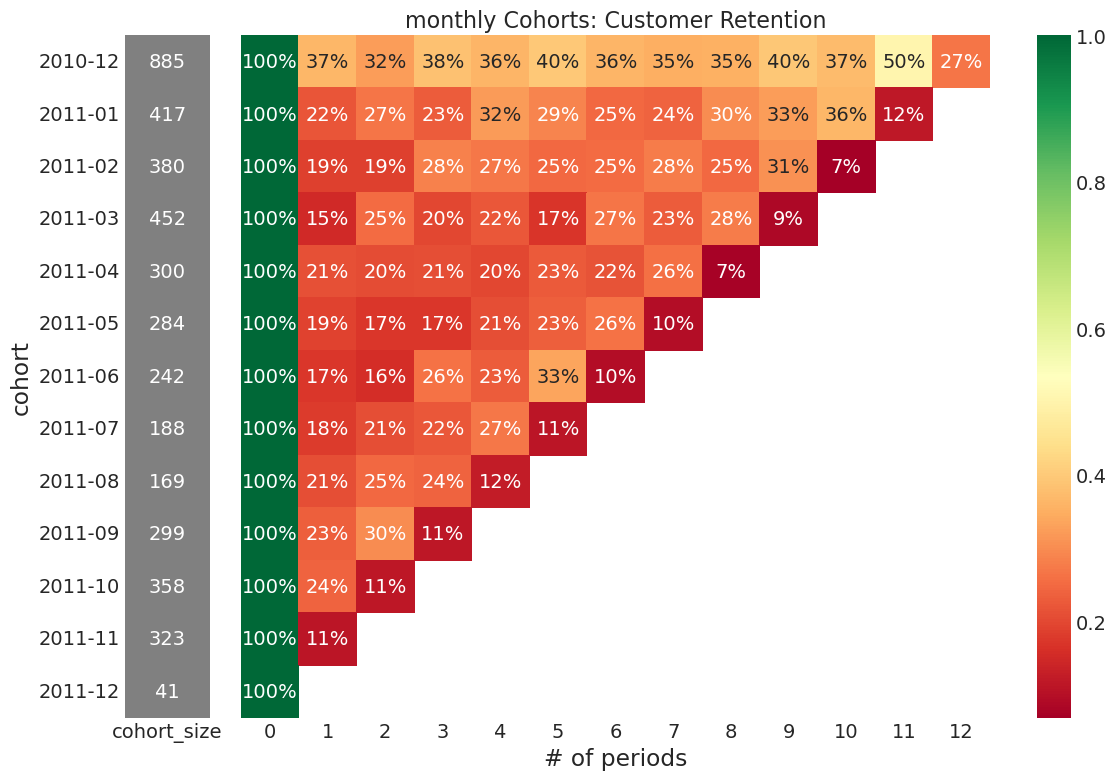

In [283]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('monthly Cohorts: Customer Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

# 5)If we exclude the first and the last cohort, which are the top 3 and least 3 cohorts regarding new customers? (cohort size)

In [279]:
cohort_size.head(4).sort_values()

cohort
2011-02    380.0
2011-01    417.0
2011-03    452.0
2010-12    885.0
Freq: M, Name: 0, dtype: float64

In [280]:
cohort_size.head(4).sort_values(ascending = False)

cohort
2010-12    885.0
2011-03    452.0
2011-01    417.0
2011-02    380.0
Freq: M, Name: 0, dtype: float64

# 6)Including all cohorts, which cohort and for which month the company has the largest customer retention? Also which cohort and for which month the company has the lowest customer retention?

In [ ]:
# the month the company has the largest customer retention is 12/2010.
# the month the company has the lowest customer retention is 02/2011.